In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Part A: Model Code (60 pts)

1. Write a function to calculate and return the Minkowski distance with optional argument p defaulting to ‘p=2’ (Euclidean) of two vectors where a vector represents a data point .[6 pts]

In [2]:
def Minkowski_Dist(v1, v2, p=2):
    '''
    input: v1 and v2 are two 1D numpy arrays with the same length
    input: p, default value p=2, p is optional
    output: float
    '''
    if len(v1) == len(v2):
        diff_array = v1-v2
        dp = 0
        for i in range(len(diff_array)):
            dp += (abs(diff_array[i]))**float(p)
        return dp**(1/float(p))
    else:
        print("Error: Different lengths of two vectors, cannot calculate Minkowski Distance.")
        return None

2. Write a function to calculate and return the accuracy of two vectors. [4 pts]

In [3]:
def Accuracy(v1, v2):
    '''
    input: v1 (actual) and v2 (predicted) are two 1D numpy arrays with same length
    output: float
    '''
    if len(v1) == len(v2):
        tp, tn, fp, fn = 0,0,0,0
        for i in range(len(v1)):
            if v1[i]==v2[i]:
                if v1[i]==True: tp+=1
                else: tn+=1
            else:
                if v1[i]==True: fn+=1
                else: fp+=1
        return (tp+tn)/(tp+tn+fp+fn)
    else:
        print("Error: Different lengths of two vectors, cannot calculate.")
        return None

3. Write three functions to compute: precision, recall and F1 score. [6 pts]

In [4]:
def Precision(v1,v2):
    '''
    input: v1 (actual) and v2 (predicted) are two 1D numpy arrays with same length
    output: float
    '''
    if len(v1) == len(v2):
        tp, tn, fp, fn = 0,0,0,0
        for i in range(len(v1)):
            if v1[i]==v2[i]:
                if v1[i]==True: tp+=1
                else: tn+=1
            else:
                if v1[i]==True: fn+=1
                else: fp+=1
        return (tp)/(tp+fp)
    else:
        print("Error: Different lengths of two vectors, cannot calculate.")
        return None
def Recall(v1,v2):
    '''
    input: v1 (actual) and v2 (predicted) are 1D numpy arrays with same length
    output: float
    '''
    if len(v1) == len(v2):
        tp, tn, fp, fn = 0,0,0,0
        for i in range(len(v1)):
            if v1[i]==v2[i]:
                if v1[i]==True: tp+=1
                else: tn+=1
            else:
                if v1[i]==True: fn+=1
                else: fp+=1
        return (tp)/(tp+fn)
    else:
        print("Error: Different lengths of two 1D numpy arrays, cannot calculate.")
        return None
def F1_score(v1,v2):
    if len(v1) == len(v2):
        recall = Recall(v1,v2)
        precision = Precision(v1,v2)
        return 2*(recall*precision)/(recall+precision)
    else:
        print("Error: Different lengths of two vectors, cannot calculate.")
        return None

4. Write a function to compute the confusion matrix of two vectors. [4 pts]

In [5]:
def Confusion_matrix(v1,v2):
    '''
    input: v1 and v2 are two 1D numpy arrays with same length
    output: matrix
    '''
    if len(v1) == len(v2):
        tp, tn, fp, fn = 0,0,0,0
        for i in range(len(v1)):
            if v1[i]==v2[i]:
                if v1[i]==True: tp+=1
                else: tn+=1
            else:
                if v1[i]==True: fn+=1
                else: fp+=1
        return np.array([[tp,fp],[fn,tn]])
    else:
        print("Error: Different lengths of two vectors, cannot calculate.")
        return None

5. Write a function to generate the Receiver Operating Characteristic (ROC) curve. [5 pts]

In [59]:
def ROC_curve(y_true, y_score):
    '''
    input: two 1D numpy arrays with the same length
    output: tpr, fpr, threshold
    '''
    if len(y_true) == len(y_score):
        thresholds = []
        for i in range(101):
            thresholds.append(i/100)
        fpr = []
        tpr = []
        for t in thresholds:
            tp, tn, fp, fn = 0,0,0,0
            for i in range(len(y_score)):
                if y_score[i]>t:
                    if y_true[i]==1: tp+=1
                    else: fp+=1
                else: 
                    if y_true[i]==1: fn+=1
                    else: tn+=1
            fpr.append(fp/(tn+fp))
            tpr.append(tp/(tp+fn))
        plt.title("ROC curve")
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.plot(fpr, tpr, color='red')
        return (fpr, tpr, thresholds)
    else:
        print("Error: Different lengths of two 1D numpy arrays, cannot calculate.")
        return None

6. Write a function to compute area under curve (AUC) for the ROC curve. [5 pts]

In [62]:
def AUC_ROC(y_true, y_score):
    '''
    input: two 1D numpy arrays with the same length
    output: float, auc
    '''
    if len(y_true) == len(y_score):
        fpr, tpr, thresholds = ROC_curve(y_true, y_score)
        # sorted roc curve
        roc = []
        for i in range(len(fpr)):
            roc.append([fpr[i],tpr[i]])
        sroc = sorted(roc)
        auc = 0
        for i in range(len(sroc)-1):
            delta = sroc[i+1][0] - sroc[i][0]
            height = 0.5 * (sroc[i+1][1] + sroc[i][1])
            auc += delta*height
        return auc
    else:
        print("Error: Different lengths of two 1D numpy arrays, cannot calculate.")
        return None

7. Write a function to generate the precision-recall curve. [5 pts]

In [8]:
def precision_recall_curve(y_true, y_score):
    '''
    input: two 1D numpy arrays with the same length
    output: precision, recall, thresholds
    '''
    if len(y_true) == len(y_score):
        thresholds = []
        for i in range(101):
            thresholds.append(i/100)
        recall = []
        precision = []
        for t in thresholds:
            tp, tn, fp, fn = 0,0,0,0
            for i in range(len(y_score)):
                if y_score[i]>t:
                    if y_true[i]==1: tp+=1
                    else: fp+=1
                else: 
                    if y_true[i]==1: fn+=1
                    else: tn+=1
            if tp+fn==0 and tp==0: recall.append(1)
            else: recall.append(tp/(tp+fn))
            if tp+fp==0 and tp==0: precision.append(1)
            else: precision.append(tp/(tp+fp))  
        plt.title("Precision-Recall Curve")
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.plot(recall, precision, color='purple')
        return (precision, recall, thresholds)
    else:
        print("Error: Different lengths of two 1D numpy arrays, cannot calculate.")
        return None

8. Implement a KNN_Classifier model class. It should have the following three methods. [20pts]

- __init__(self,) [5 pts]
- fit(self, X, Y) This method simply needs to store the relevant values as instance variables. [5 pts]
- predict(self, X) This method will use the instance variables stored by the fit method. [2 pts]
- predict_proba(self, X) Same as c) but for probabilities [3 pts]
- get_params(self) Get parameters for this estimator. [3 pts]
- set_params(self, **params) [2 pts]

In [9]:
class KNN_Classifier(object):
    
    def __init__(self, n_neighbors=5, weights='uniform',p=2):
        '''
        n_neighbors: int, default = 5
        weights: {'uniform', 'distance'}, default = 'uniform'
        p: int, default = 2
        '''
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p
        
    def fit(self, X, y):
        ''' remember the training data sets: self.training_fm, self.training_tv
        X: training features
        y: training target values
        '''
        if len(X)==len(y):
          self.training_fm = X
          self.training_tv = y
        else:
          print('Error: different length of training feature and target vector.')
        
    def predict_proba(self, X):
        '''return the predicted probability
        
        Parameters
        ----------
        X: Test samples, length of n (n observations), each observation has k features
        
        Returns
        -------
        y: ndarray, predicted probability
        '''
        n_tr = len(self.training_tv)
        n_te = len(X)

        # generate a (n_te)-by-(n_tr) minkowski distance matrix 
        distance_matrix = []
        for i in range(n_te): # i is index for test set
            te_to_tr_distance = []
            for j in range(n_tr): # j is index for training set
                te_to_tr_distance.append(Minkowski_Dist(X[i], self.training_fm[j], p=2))
            distance_matrix.append(te_to_tr_distance)
        
        # find the nearest (5) neighbors based on the distance matrix
        # create a (n_te)-by-(n_tr) neighbor_matrix that contains 0 and 1 
        neighbor_matrix = []
        for i in range(n_te):
            sd = sorted(distance_matrix[i])
            dist = sd[self.n_neighbors]
            neighbor = []
            for j in distance_matrix[i]:
                if j==0 or j>dist: neighbor.append(0)
                else: neighbor.append(1)
            neighbor_matrix.append(neighbor)
        
        # get target value of the neighbors
        # create a (n_te)-by-1 matrix of weighted-average neighbor's target value 
        neighbor_average_y = []
        for i in range(n_te):
            neighbor_y = []
            for j in range(n_tr):
                if neighbor_matrix[i][j]==1: neighbor_y.append(self.training_tv[j])
            
            # different weighting: uniform and inverse-distance
            if self.weights == 'uniform':
                neighbor_average_y.append(sum(neighbor_y)/self.n_neighbors)
            if self.weights == 'distance':
                total_inverse_distance = 0
                for j in range(n_tr):
                    if neighbor_matrix[i][j]==1: total_inverse_distance += 1/distance_matrix[i][j]
                weighted_neighbor_label = 0
                for j in range(n_tr):
                    if neighbor_matrix[i][j]==1: 
                        weighted_neighbor_label += self.training_tv[j]*(1/distance_matrix[i][j])/total_inverse_distance
                neighbor_average_y.append(weighted_neighbor_label)
               
        return neighbor_average_y
    
    def predict(self, X, threshold=0.5):
        '''
        Predict the class labels for the provided data (testing).
        
        Parameters
        ----------
        X: Test samples, length of n (n observations), each observation has k features
        threshold: default = 0.5
        
        Returns
        -------
        y: ndarray, class labels for each data sample
        '''
        neighbor_average_y = self.predict_proba(X)

        y_pred = []
        for i in neighbor_average_y:
            if i >= threshold: y_pred.append(1)
            else: y_pred.append(0)

        return y_pred

    def get_params(self):
        knn_dict = {'p': self.p,
                   'n_neighbor': self.n_neighbor,
                   'weights': self.weights}
        return knn_dict
        
    def set_params(self, **params):
        """Set the parameters of this estimator.
        Returns
        -------
        self
        """
        for k in params.keys():
            self.k = params[k]
        return self

9. Write a function named “partition” to split your data into training and test sets. The function should take 4 arguments: [5 pts]

In [10]:
def partition(fm, tv, t, shuffle=True):
    '''
    input - 4 arguments: feature matrix, target vector, t (test size), shuffle (default is True)
    output - tuple of 4, (train_fm, test_fm, tv_train, tv_test)
    '''
    if len(fm)==0 or len(tv)==0:
        print('Error: length of features or target is zero')
        return None
    if len(fm)!=len(tv): 
        print("Error: feature matrix and target vector have different lengths")
        return None
    
    # create a list of index
    n = len(fm)
    index_list = list(range(n))
    # if shuffle, shuffle the index_list
    if shuffle == True:
        import random
        random.shuffle(index_list)
    
    # split the index based on the test size: t, t is between 0 and 1
    test_size = round(n*t)
    test_index = index_list[:test_size] 
    train_index = index_list[test_size:]
    
    list_train_fm, list_test_fm, list_train_tv, list_test_tv = [], [], [], []
    for i in test_index:
        list_test_fm.append(list(fm[i]))
        list_test_tv.append(tv[i])
    for i in train_index:
        list_train_fm.append(list(fm[i]))
        list_train_tv.append(tv[i])
    train_fm, test_fm = np.array(list_train_fm), np.array(list_test_fm)
    train_tv, test_tv = np.array(list_train_tv), np.array(list_test_tv)
    
    return (train_fm, test_fm, train_tv, test_tv)

# Part B: Data Processing, Feature Selection, and Initial Estimation (40 pts)
10. Read in the winequality-white.csv file as a Pandas data frame.

In [11]:
dfw = pd.read_csv('winequality-white.csv', sep=';')

11. The target will be the “quality” column which represents the rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine). [2 pts]

In [12]:
# target: goodq (good quality)
dfw['goodq'] = np.nan
dfw.loc[dfw['quality']>5, 'goodq'] = 1
dfw.loc[dfw['quality']<=5, 'goodq'] = 0

12. Provide a table with univariate statistics of your data (mean, standard deviation, and quartiles, min, max, missing count, number of unique values). [4 pts]

In [13]:
dfw.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodq
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


13. Generate pair plots using the seaborn package to help identify redundant features. For any redundant features(?), report, drop, and explain your logic (w/ markdown). [4 pts]
- 'quality' and 'goodq' should not be plotted, they belong to dependent variable's information

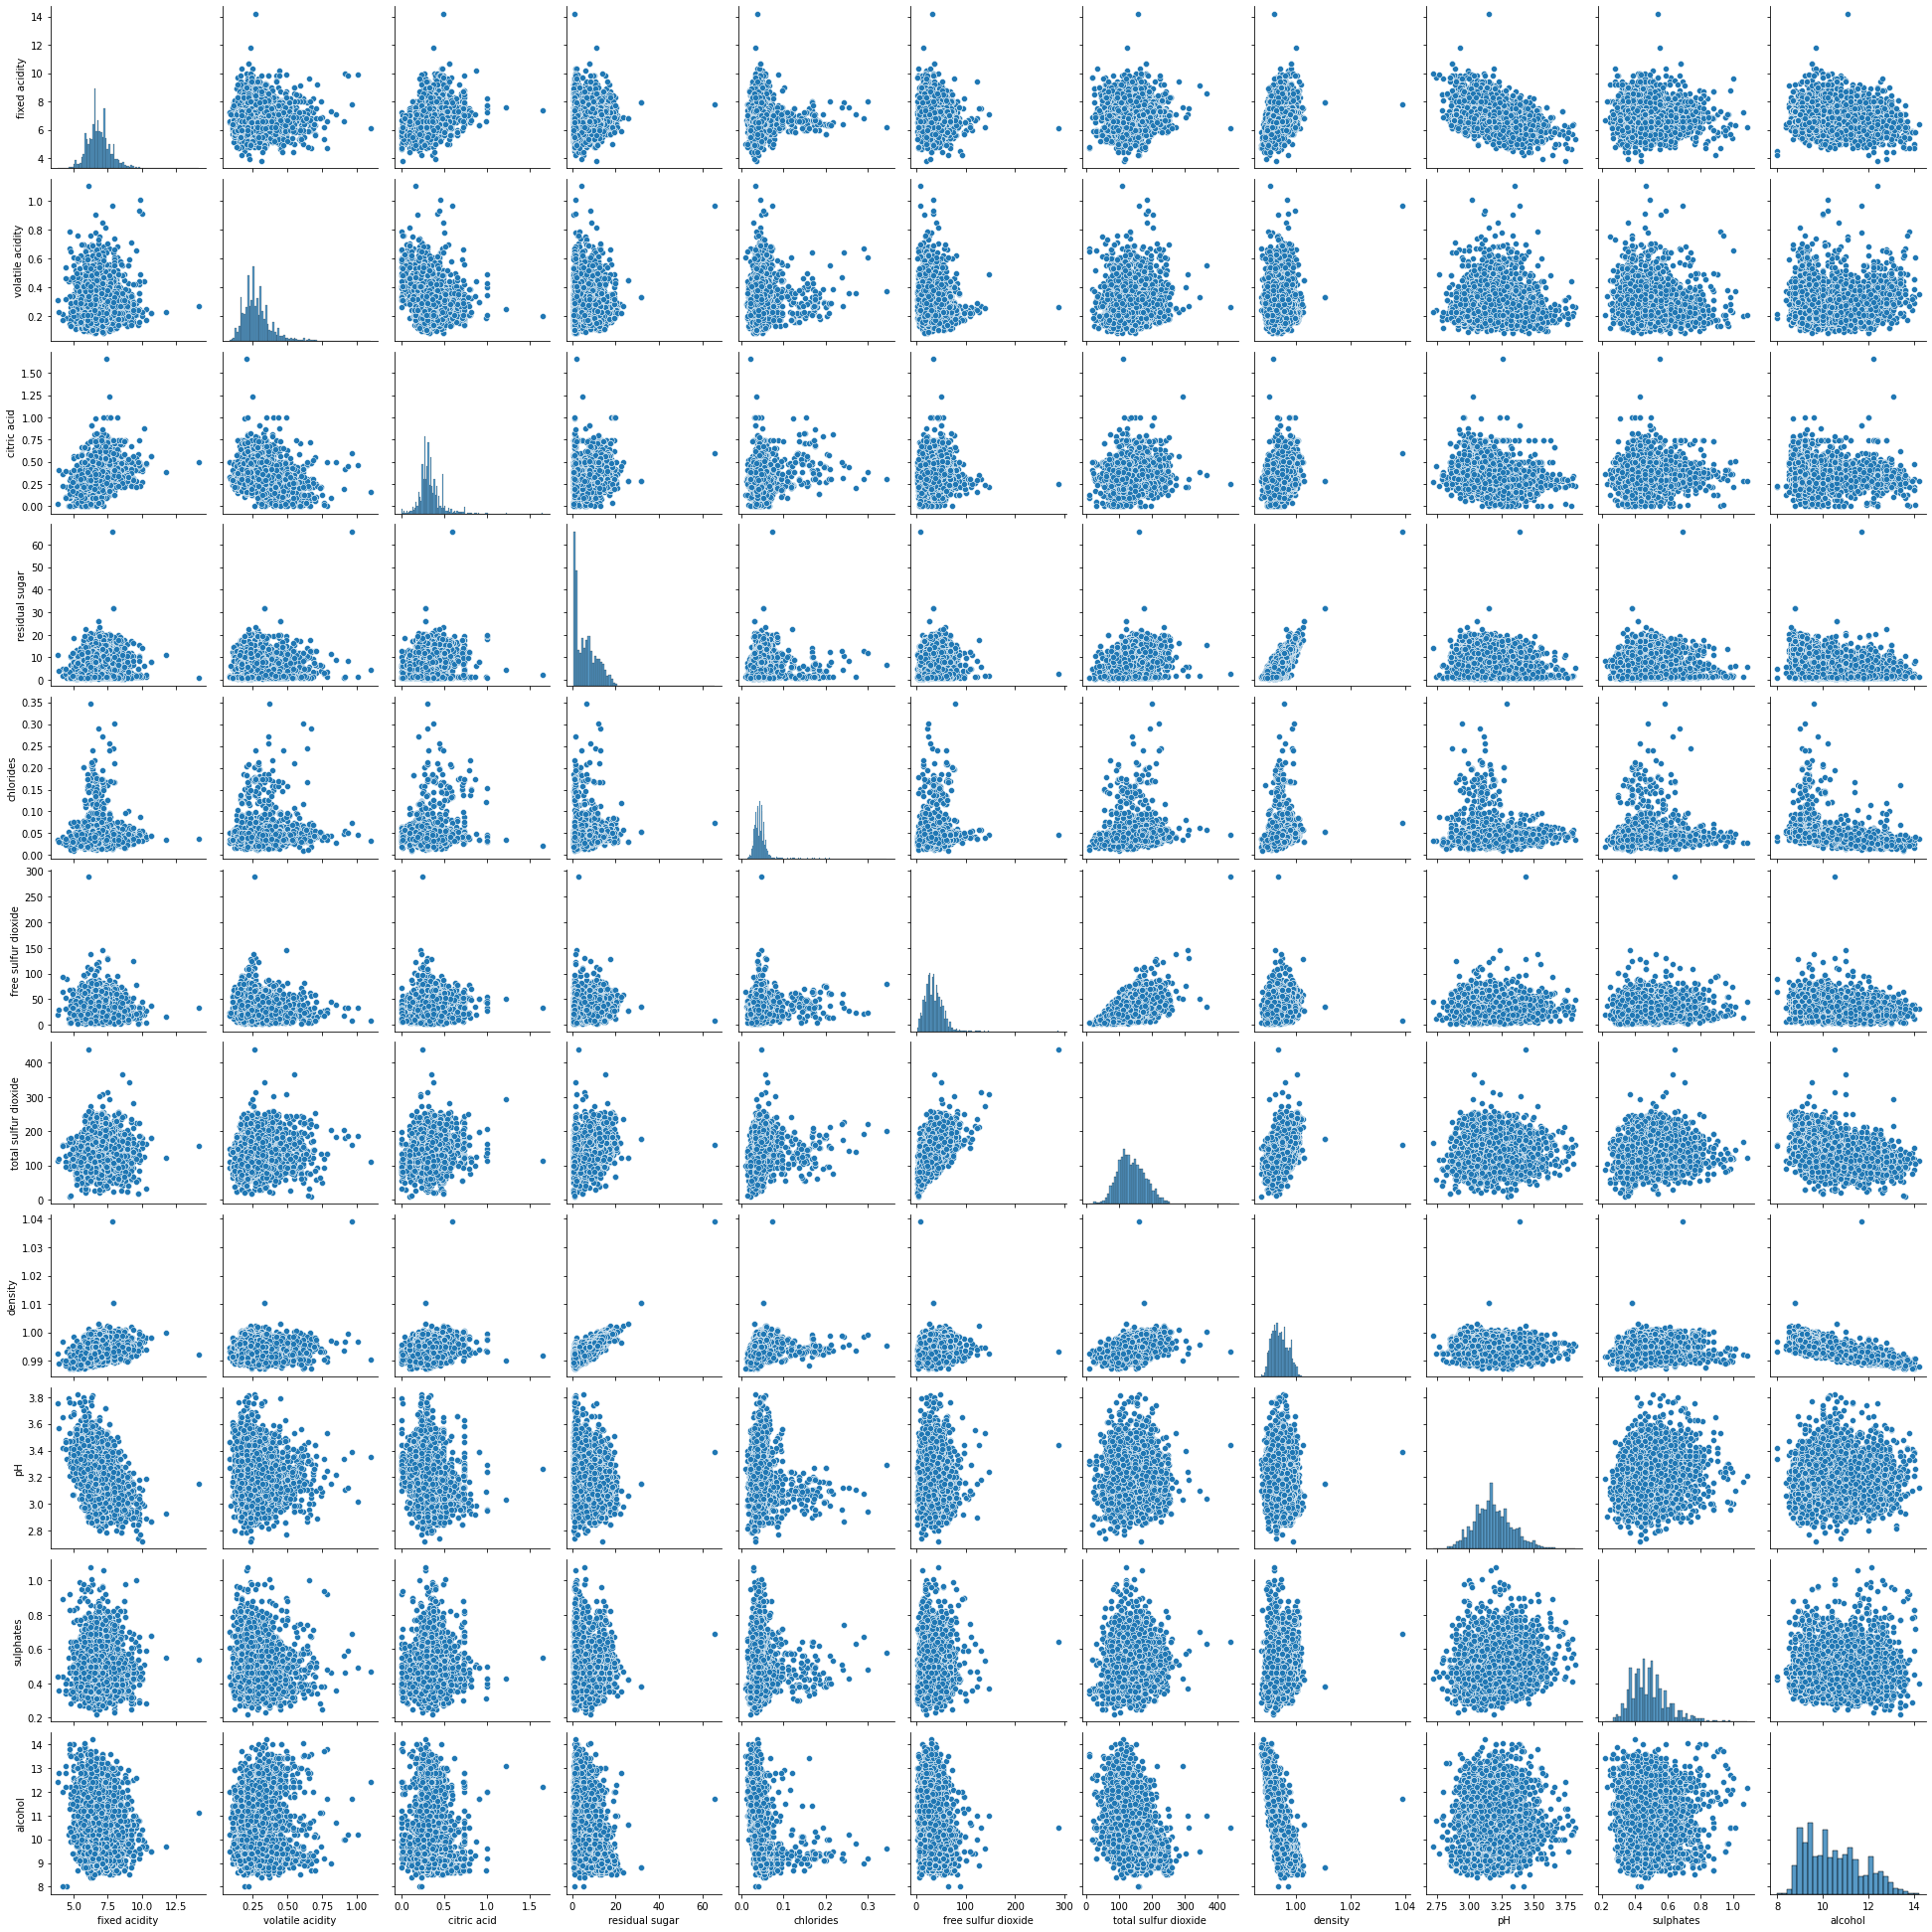

In [14]:
sns.pairplot(dfw.loc[:, ~dfw.columns.isin(['quality', 'goodq'])])

14. Use your “partition” function to split the data into 80% train and 20% test. [5 pts]

In [15]:
# convert dataframe into numpy arrays
fm = dfw.loc[:, ~dfw.columns.isin(['quality', 'goodq'])].to_numpy()
tv = dfw['goodq'].to_numpy()
# split using partition function
train_fm, test_fm, train_tv, test_tv = partition(fm, tv, 0.2, True)

In [16]:
train_fm[:1], test_fm[:1], train_tv[:10], test_tv[:10]

(array([[6.7000e+00, 2.0000e-01, 3.7000e-01, 1.6500e+00, 2.5000e-02,
         4.2000e+01, 1.0300e+02, 9.9022e-01, 3.1100e+00, 4.5000e-01,
         1.1400e+01]]),
 array([[6.300e+00, 1.900e-01, 2.100e-01, 1.800e+00, 4.900e-02, 3.500e+01,
         1.630e+02, 9.924e-01, 3.310e+00, 5.000e-01, 1.030e+01]]),
 array([0., 1., 1., 1., 0., 0., 1., 1., 1., 1.]),
 array([1., 0., 0., 1., 1., 1., 0., 1., 1., 0.]))

15. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and
using Euclidean distance. [15 pts]
- a). Use accuracy and F1 score to compare your predictions to the expected labels.
- b). Now standardize each feature of your training set (subtract mean and divide by standard deviation) and apply trained standardization to the test set. Use the mean and standard deviation values for each feature in the training set to scale the test data (you can use sklearn.preprocessing.StandardScaler)
- c). Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.
- d). Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment.
- e). Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. [5 pts]

In [17]:
model = KNN_Classifier(n_neighbors=5, weights='uniform',p=2)
model.fit(X=train_fm, y=train_tv)
y_knn = model.predict(X=test_fm)
# a) Use accuracy and F1 score to compare your predictions to the expected labels
print('(Before standardization) Accuracy of knn model: ', Accuracy(test_tv, y_knn))
print('(Before standardization) F1 score of knn model: ', F1_score(test_tv, y_knn))
# b) Standardization
scaler = StandardScaler()
scaler.fit(train_fm)
sd_train_fm = scaler.transform(train_fm)
sd_test_fm = scaler.transform(test_fm)
# c) re-run KNN
sd_model = KNN_Classifier(n_neighbors=5, weights='uniform',p=2)
sd_model.fit(X=sd_train_fm, y=train_tv)
sd_y_knn = sd_model.predict(X=sd_test_fm)
# d) compare scaled and unscaled data - scaled data works better for KNN model
print('(After standardization) Accuracy of knn model: ', Accuracy(test_tv, sd_y_knn))
print('(After standardization) F1 score of knn model: ', F1_score(test_tv, sd_y_knn))
# e) Inverse-distance weighting for KNN
model = KNN_Classifier(n_neighbors=5, weights='distance',p=2)
model.fit(X=train_fm, y=train_tv)
y_knn = model.predict(X=test_fm)
print('(Before standardization) Accuracy of inverse-distance-weighted knn model: ', Accuracy(test_tv, y_knn))
print('(Before standardization) F1 score of inverse-distance-weighted knn model: ', F1_score(test_tv, y_knn))
sd_model = KNN_Classifier(n_neighbors=5, weights='distance',p=2)
sd_model.fit(X=sd_train_fm, y=train_tv)
sd_y_knn = sd_model.predict(X=sd_test_fm)
print('(After standardization) Accuracy of inverse-distance-weighted knn model: ', Accuracy(test_tv, sd_y_knn))
print('(After standardization) F1 score of inverse-distance-weighted knn model: ', F1_score(test_tv, sd_y_knn))

(Before standardization) Accuracy of knn model:  0.6714285714285714
(Before standardization) F1 score of knn model:  0.7716312056737589
(After standardization) Accuracy of knn model:  0.7387755102040816
(After standardization) F1 score of knn model:  0.8125915080527086
(Before standardization) Accuracy of inverse-distance-weighted knn model:  0.6775510204081633
(Before standardization) F1 score of inverse-distance-weighted knn model:  0.7696793002915452
(After standardization) Accuracy of inverse-distance-weighted knn model:  0.7408163265306122
(After standardization) F1 score of inverse-distance-weighted knn model:  0.808446455505279


16. Repeat #15 a-d, but using a logistic regression with ‘elasticnet’ or ‘l2’ penalty (feel free to use sklearn.linear_model.LogisticRegression) [10 pts]

In [18]:
# a) accuracy and F1 score
logit_model = LogisticRegression(random_state=42).fit(train_fm, train_tv)
y_pred = logit_model.predict(test_fm)
print('(Before standardization) Accuracy of logistic model: ', Accuracy(test_tv, y_pred))
print('(Before standardization) F1 score of logistic model: ', F1_score(test_tv, y_pred))
# b) standardization
scaler = StandardScaler()
scaler.fit(train_fm)
sd_train_fm = scaler.transform(train_fm)
sd_test_fm = scaler.transform(test_fm)
# c) re-run logistic model
sd_logit_model = LogisticRegression(penalty='l2').fit(sd_train_fm, train_tv)
sd_y_pred = logit_model.predict(sd_test_fm)
# d) compare - unscaled data performs better in logistic model
print('(After standardization) Accuracy of logistic model: ', Accuracy(test_tv, sd_y_pred))
print('(After standardization) F1 score of logistic model: ', F1_score(test_tv, sd_y_pred))

(Before standardization) Accuracy of logistic model:  0.7642857142857142
(Before standardization) F1 score of logistic model:  0.8351177730192719
(After standardization) Accuracy of logistic model:  0.610204081632653
(After standardization) F1 score of logistic model:  0.6396226415094339


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Part C: Model Evaluation and Results Summary (100 pts)

17. Evaluation of an estimator performance via cross-validation: Implement the S-fold cross
validation function. [15 pts]

In [19]:
def sFold(folds, data, labels, model, model_args, error_fuction):
    '''
    Parameters
    ----------
    - folds: int
    - data: numpy array, feature matrix
    - labels: numpy array, labels of training labels
    - model: object with the fit and predict methods
    - model_args: dictionary 
    - error_function: returns error value between predicted and true labels, eg: mean square error
    
    Return: a tuple containing: expected labels, predicted labels, average error
    '''
    if len(data)!=len(labels):
        print('Error: different lengths between data and labels') 
        return None 

    # use KFold function toto shuffle and split
    kf = KFold(n_splits=folds, shuffle=True)
    
    # repeat the model k times
    k_performance = []
    k_expected_labels = []
    k_predicted_labels = []
    for train_index, test_index in kf.split(labels):
        k_fold_train_fm = data[train_index]
        k_fold_train_tv = labels[train_index]
        k_fold_test_fm = data[test_index]
        k_fold_test_tv = labels[test_index]

        # train the model
        km = model(**model_args)
        km.fit(k_fold_train_fm, k_fold_train_tv)
        # make a prediction
        k_fold_y_pred = km.predict(k_fold_test_fm)
        # calculate performance
        k_performance.append(error_fuction(k_fold_test_tv, k_fold_y_pred))

        # Expected labels
        k_el = np.stack((test_index,k_fold_test_tv), axis=1)
        k_expected_labels.append(k_el)
        # Predicted labels
        k_pl = np.stack((test_index,k_fold_y_pred), axis=1)
        k_predicted_labels.append(k_pl)
    
    # sort expected labels and predicted labels by index
    sk_el, sk_pl = np.sort(k_expected_labels, axis=0), np.sort(k_predicted_labels, axis=0)
    expected_labels, predicted_labels = [], []
    for i in range(len(sk_el)):
        expected_labels.append(sk_el[i][1])
        predicted_labels.append(sk_pl[i][1])

    return np.array(expected_labels), np.array(predicted_labels), sum(k_performance)/float(folds)

18. Only using the training portion of your data, use your sfold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets: [10 pts]
- k = [1,5,9,11], distance = [Euclidean, Manhattan]
- weights = [uniform, distance]
- Store the returned tuple for each in a pandas DataFrame.
- Determine the best model based on the overall performance (lowest v. average error). For the error_function of the S-fold function argument use the F1 score function.

In [24]:
k_set = [1,5,9,11]
distance_set = [1, 2] # value of p, corresponding to Manhattan and Euclidean distance
weights_set = ['uniform', 'distance']
for k in k_set:
    for d in distance_set:
        for w in weights_set:
            kwarg = {'n_neighbors': k, 'p': d, 'weights':w}
            a, b, c = sFold(folds=5, data=fm[:1000], labels=tv[:1000],
                            model = KNN_Classifier, model_args = kwarg,
                            error_fuction=mean_squared_error)
            print('When k is',k,', p is',d,', weight is: "',w, '", Mean square error = ', c)

When k is 1 , p is 1 , weight is: " uniform ", Mean square error =  0.40800000000000003
When k is 1 , p is 1 , weight is: " distance ", Mean square error =  0.414
When k is 1 , p is 2 , weight is: " uniform ", Mean square error =  0.38499999999999995
When k is 1 , p is 2 , weight is: " distance ", Mean square error =  0.42200000000000004
When k is 5 , p is 1 , weight is: " uniform ", Mean square error =  0.339
When k is 5 , p is 1 , weight is: " distance ", Mean square error =  0.348
When k is 5 , p is 2 , weight is: " uniform ", Mean square error =  0.34500000000000003
When k is 5 , p is 2 , weight is: " distance ", Mean square error =  0.36499999999999994
When k is 9 , p is 1 , weight is: " uniform ", Mean square error =  0.329
When k is 9 , p is 1 , weight is: " distance ", Mean square error =  0.34199999999999997
When k is 9 , p is 2 , weight is: " uniform ", Mean square error =  0.348
When k is 9 , p is 2 , weight is: " distance ", Mean square error =  0.333
When k is 11 , p is 1 


19) Repeat #18 for at least 3 experiments for the regularized logistic regression from #16 and discuss why you optimized over you selected hyper-parameters [10 pts]

In [39]:
from pandas.core.dtypes.cast import maybe_unbox_datetimelike_tz_deprecation
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
reg_set = ['l1', 'l2', 'none']
for r in reg_set:
    kwarg = {'penalty': r, 'max_iter': 200, 'solver':'saga'}
    a, b, c = sFold(folds=5, data=fm[:2000], labels=tv[:2000],
                model = LogisticRegression , model_args = kwarg,
                error_fuction = mean_squared_error)
    print('When regularization is',r,', Mean square error = ', c)


When regularization is l1 , Mean square error =  0.3495
When regularization is l2 , Mean square error =  0.351
When regularization is none , Mean square error =  0.34700000000000003


20. Based on the results above, use the full training portion (80%), to re-estimate your best model. Discuss your model choice. [5 pts]

In [64]:
# best model: KNN with 9 neighbors, uniform weights and Manhattan Distance
# Standardizaztion
scaler = StandardScaler()
scaler.fit(train_fm)
sd_train_fm, sd_test_fm = scaler.transform(train_fm), scaler.transform(test_fm)
# train and test the model
sd_model = KNN_Classifier(n_neighbors=9, weights='uniform',p=1)
sd_model.fit(X=sd_train_fm, y=train_tv)
sd_y_knn = sd_model.predict(X=sd_test_fm)
sd_y_knn_score = sd_model.predict_proba(X=sd_test_fm)
print('(scaled) mean squared error:', mean_squared_error(test_tv, sd_y_knn))

(scaled) mean squared error: 0.25204081632653064


21. Evaluate your best model on the test data and report the performance measures.[10 pts]
- Precision 
- Recall
- F1 score
- Confusion matrix
- Accuracy & Generalization Error

In [43]:
print('Precision of best model:', Precision(test_tv, sd_y_knn))
print('Recall of best model:', Recall(test_tv, sd_y_knn))
print('F1 score of best model:', F1_score(test_tv, sd_y_knn))
print('confusion matrix of best model:', Confusion_matrix(test_tv, sd_y_knn))
print('Accuracy and generalization error of best model:', Accuracy(test_tv, sd_y_knn))

Precision of best model: 0.7758389261744967
Recall of best model: 0.878419452887538
F1 score of best model: 0.8239486813970064
confusion matrix of best model: [[578 167]
 [ 80 155]]
Accuracy and generalization error of best model: 0.7479591836734694


22. Generate the ROC curve and determine the optimal threshold that maximizes the F1 score.
[10 pts]

Optimal threshold is: 0.5


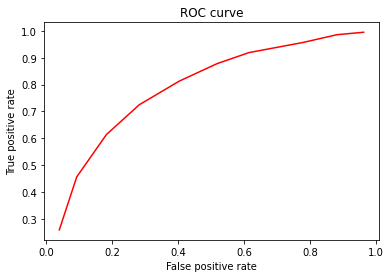

In [65]:
ROC_curve(test_tv, sd_y_knn_score)
print('Optimal threshold is:','???')

23. Compute the AUC score. [5 pts]

In [57]:
from sklearn.metrics import roc_auc_score
print('AUC is:', roc_auc_score(test_tv, sd_y_knn_score))

AUC is: 0.7872151635862487


24. Generate the precision-recall curve and determine the optimal threshold. [5 pts]

Optimal threshold is: 0.5


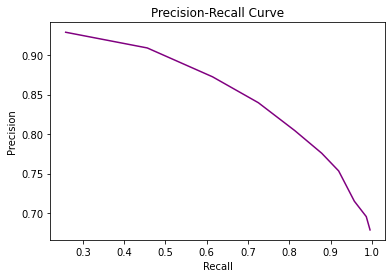

In [66]:
precision_recall_curve(test_tv, sd_y_knn_score)
print('Optimal threshold is:','???')

25. Calculate and report the 95% confidence interval on the generalization error estimate. [5pts]

In [70]:
acc = Accuracy(test_tv, sd_y_knn)
cilow = acc - 1.96 * (( (acc * (1 - acc)) / len(test_tv))**0.5)
cihigh = acc + 1.96 * (( (acc * (1 - acc)) / len(test_tv))**0.5)
print('95% confidence interval for generalization error is:', cilow,',', cihigh)

95% confidence interval for generalization error is: 0.7207749295275601 , 0.7751434378193787


26. Write a “Summary and Methods” section. [10 pts] 
- Provide a summary of the project and what you completed in the assignment.
- Describe the dataset and features. What is the target? What are you calculating it from? 
- Describe the differences in fit and predict between the regularized logistic regression vs KNN_Classifier. In particular, discuss training time vs prediction time for large data. Also discuss the hyperparameters of each and why they are used.

#### Answer
- In this project, I build a knn model to predict white wine's quality, compare it across different parameters and with logistic regression model. 
- My data set consists of white wine's quality and features. The target is good or bad quality, based on the quality rating.
- My best model is a uniform-knn with 9 neighbors and Manhattan distance using scaled data.


27. Write a “Results” section. [15 pts]
- Describe the performance of the KNN model with respect to the different levels of k and the different distance metrics. Include a table of performances, bolding the best.
- Characterize the overall performance of your model.
- Discuss which quality values led to good performance of your model and those that resulted in poor performance. Include a table of average error (e.g., F1 score) to support your claims.
- Give any final conclusions.

#### Answer
- Here is a list of my knn models and their performance:
- Overall, this "toy model" is working good, as it workds better than logistics model. 
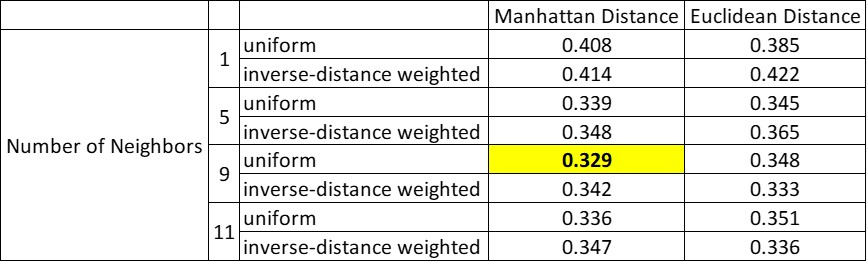
